In [1]:
# Practice script to explore machine learning processes using sklearn
# Script edited from MachineLearningMastery.com
# https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
scipy: 0.19.0
numpy: 1.12.1
matplotlib: 2.0.0
pandas: 0.19.2
sklearn: 0.19.1


In [3]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
%matplotlib inline

In [24]:
datafile = "/Users/Dylan/Desktop/administration_data_noNA.csv"
dataset = pandas.read_csv(datafile)

In [25]:
# shape
print(dataset.shape)

(725, 8)


In [26]:
print(dataset.head(20))

    data_id            language form  age  gender          mom_ed  \
0    145913  English (American)   WG   18  Female        Graduate   
1    145914  English (American)   WG   18    Male        Graduate   
2    145915  English (American)   WG   18    Male    Some College   
3    145916  English (American)   WG   18    Male         College   
4    145917  English (American)   WG   18  Female    Some College   
5    145918  English (American)   WG   17    Male    Some College   
6    145919  English (American)   WG   17  Female    Some College   
7    145920  English (American)   WG   17    Male  Some Secondary   
8    145921  English (American)   WG   17  Female    Some College   
9    145922  English (American)   WG   17    Male   Some Graduate   
10   145923  English (American)   WG   17  Female         College   
11   145924  English (American)   WG   17    Male         College   
12   145925  English (American)   WG   18  Female       Secondary   
13   145926  English (American)   

In [27]:
print(dataset.describe())

             data_id         age  comprehension  production
count     725.000000  725.000000     725.000000  725.000000
mean   146470.277241   14.583448     149.354483   35.736552
std       334.781889    1.982730      95.476545   53.888065
min    145913.000000   12.000000       0.000000    0.000000
25%    146194.000000   13.000000      72.000000    5.000000
50%    146489.000000   14.000000     128.000000   16.000000
75%    146788.000000   16.000000     214.000000   38.000000
max    147001.000000   18.000000     396.000000  376.000000


In [28]:
print(dataset.groupby('mom_ed').size())

mom_ed
College           192
Graduate           96
Primary             2
Secondary         194
Some College      175
Some Graduate      33
Some Secondary     33
dtype: int64


<function matplotlib.pyplot.show>

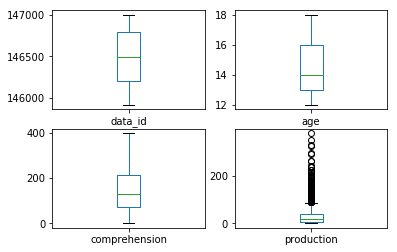

In [29]:
dataset.plot(kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show

<function matplotlib.pyplot.show>

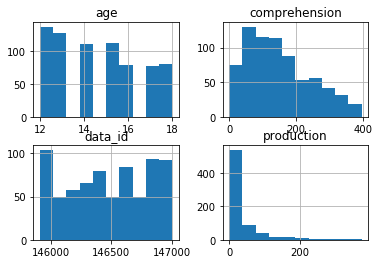

In [30]:
dataset.hist()
plt.show

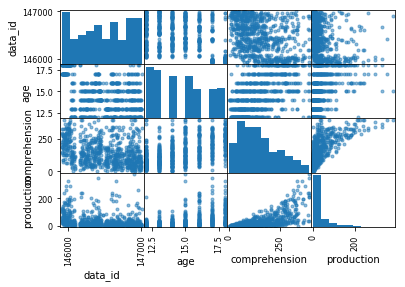

In [31]:
scatter_matrix(dataset)
plt.show()

In [32]:
#Split validation dataset
array = dataset.values
X = array[:,[3,6,7]]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [33]:
# Test option and evaluaton metric
seed = 7
scoring = 'accuracy'

In [34]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.287931 (0.042965)
LDA: 0.293103 (0.049372)
KNN: 0.289655 (0.049251)
CART: 0.282759 (0.051262)
NB: 0.275862 (0.056661)


/Users/Dylan/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/Dylan/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


SVM: 0.286207 (0.068620)


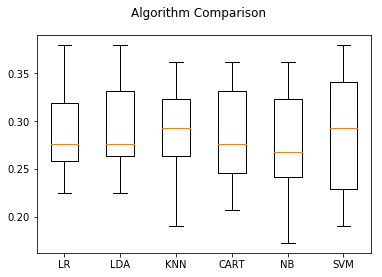

In [35]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [36]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.262068965517
[[12  3  0  9  8  0  0]
 [ 9  5  0  7  2  0  0]
 [ 0  0  0  1  0  0  0]
 [12  2  0 18  9  0  1]
 [18  3  0  6  3  0  1]
 [ 3  0  0  3  0  0  0]
 [ 4  3  0  3  0  0  0]]
                precision    recall  f1-score   support

       College       0.21      0.38      0.27        32
      Graduate       0.31      0.22      0.26        23
       Primary       0.00      0.00      0.00         1
     Secondary       0.38      0.43      0.40        42
  Some College       0.14      0.10      0.11        31
 Some Graduate       0.00      0.00      0.00         6
Some Secondary       0.00      0.00      0.00        10

   avg / total       0.24      0.26      0.24       145



/Users/Dylan/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
